### Fine Tip Clearance Test Objective


### Procedure
- Ensure the drone is positioned on the tester rails such that the fishing line is slack
- Fix the current limit of the DC power supply connected in parallel with the lead acid battery to the same value for all tests. This should be a value between 2 and 8 amps, since the supply is fused at 10A
- Initiate sweep from 30-100% throttle in increments of 10%, holding each throttle for 10 seconds.
- At each throttle step, allow ~2s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Static Tip Clearance | Clearance to Height Ratio (%) |
|-                     |-                              |
| 1.0 mm               | 14.3 %                        |
| 0.9 mm               | 12.9 %                        |
| 0.8 mm               | 11.4 %                        |
| 0.7 mm               | 10.0 %                        |
| 0.6 mm               | 8.57 %                        |
| 0.5 mm               | 7.14 %                        |
| 0.4 mm               | 5.71 %                        |
| 0.3 mm               | 4.29 %                        |
| 0.2 mm               | 2.86 %                        |
| 0.1 mm               | 1.43 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.

In [28]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 30 to 100% throttle in increments of 10%, holding at each step for 10 seconds

In [29]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 10_000
step_range = np.arange(30, 101, 10)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])

In [30]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])


### Execute Tests

In [188]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 30000
mount_test_throttle = 80
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [7]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 317,3771,0,13.986000,10.240000,0.101780,-0.264290,0.029304,0.000000

Rx: 4173,0,0,13.986000,10.240000,-0.029080,-0.180830,0.029304,0.000000

Rx: 8176,0,0,13.986000,10.240000,0.014540,-0.208650,0.029304,0.518775

Rx: 12174,0,0,13.986000,10.240000,0.014540,-0.264290,0.029304,0.000000

Rx: 16172,0,0,13.965000,10.240000,0.043620,-0.208650,0.029304,0.000000

Rx: 20178,0,0,13.986000,10.240000,0.043620,-0.041730,0.029304,0.000000

Rx: 24172,0,0,14.007000,10.240000,0

In [32]:
test_directory = Path("../test_data/revised_fine_single_prop/")

In [176]:
data_dict = {}
files = [
    # control
    "test_open_single_pb_0.csv",
    # "test_open_single_pb_1.csv",
    # "test_open_single_pb_2.csv",
    # "test_open_single_pb_3.csv",
    
    # 1mm testing
    # "test_1mm_single_pb_0.csv",
    # "test_1mm_single_pb_1.csv",
    # "test_1mm_single_pb_2.csv",
    # "test_1mm_single_pb_3.csv",
    # "test_1mm_single_pb_4.csv",
    # "test_1mm_single_pb_5.csv",

    # "test_1mm_single_shell_lip_0.csv",
    # "test_1mm_single_shell_lip_1.csv",
    
    # #0.5mm testing
    # "test_0.5mm_single_pb_0.csv",
    # "test_0.5mm_single_pb_1.csv",
    # "test_0.5mm_single_pb_2.csv",
    # "test_0.5mm_single_pb_3.csv",
    
    # #0.4mm testing
    # "test_0.4mm_single_pb_0.csv",
    # "test_0.4mm_single_pb_1.csv",
    # "test_0.4mm_single_pb_2.csv",
    # "test_0.4mm_single_pb_3.csv",
    
    # "test_0.4mm_single_shell_lip_0.csv",
    # "test_0.4mm_single_shell_lip_1.csv",

    # #0.3mm testing
    # "test_0.3mm_single_pb_0.csv",
    # "test_0.3mm_single_pb_1.csv",
    # "test_0.3mm_single_pb_2.csv",
    # "test_0.3mm_single_pb_3.csv"
    
    # #0.2mm testing
    #  "test_0.2mm_single_pb_0.csv",
    #  "test_0.2mm_single_pb_1.csv",
    #  "test_0.2mm_single_pb_2.csv",
    # "test_0.3mm_single_pb_3.csv"

    "test_0.2mm_single_shell_lip_0.csv",
    "test_0.2mm_single_shell_lip_1.csv",

    "test_0.2mm_single_lip_0.csv",
    "test_0.2mm_single_lip_1.csv",
    "test_0.2mm_single_lip_2.csv",

    "test_0.1mm_single_lip_0.csv",

    # #0.6mm testing
    # "test_0.6mm_single_pb_0.csv",
    # "test_0.6mm_single_pb_1.csv",
    # "test_0.6mm_single_pb_2.csv",
    
    # #0.7mm testing
    # "test_0.7mm_single_pb_0.csv",
    # "test_0.7mm_single_pb_1.csv",
    # "test_0.7mm_single_pb_2.csv",
    # "test_0.7mm_single_pb_3.csv",
    # "test_0.7mm_single_pb_4.csv",
    # "test_0.7mm_single_pb_5.csv",

    # "test_0.7mm_single_shell_0.csv",
    # "test_0.7mm_single_shell_1.csv",

    # "test_0.7mm_single_shell_lip_0.csv",
    # "test_0.7mm_single_shell_lip_1.csv",

    # #0.8mm testing
    # "test_0.8mm_single_pb_0.csv",
    # "test_0.8mm_single_pb_1.csv",
    # "test_0.8mm_single_pb_2.csv",
    
    # #0.9mm testing
    # "test_0.9mm_single_pb_0.csv",
    # "test_0.9mm_single_pb_1.csv",
    # "test_0.9mm_single_pb_2.csv",
]

for file in files:
    data_dict[file] = test_run(
        filename=test_directory / file, plan=plan
    )

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: Invalid command: ,53,0,0

Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 347,1300,0,13.986000,10.240000,0.043620,-0.069550,0.599530,0.000000

Rx: 4173,0,0,13.944000,10.240000,0.043620,-0.111280,0.599530,0.000000

Rx: 8175,0,0,13.986000,10.240000,0.014540,-0.069550,0.599530,0.000000

Rx: 12174,0,0,13.944000,10.240000,0.087240,-0.139100,0.599530,0.000000

Rx: 16175,0,0,13.986000,10.240000,0.043620,-0.208650,0.59953

### Data Analysis

In [177]:
# Aggregate test data
tip_filename_regex = re.compile(r"test_(\d*\.?\d*)mm")


df_all = pd.concat(
    data_dict.values(),
    keys=[
        (
            file,
            (
                float(match.group(1))
                if (match := tip_filename_regex.match(file))
                else 0.0 #'Open Air'
            ),
        )
        for file in files
    ],
    names=["test_name", "tip_clearance_mm"],
).sort_index()
df_all

top_motor_rpm  \
test_name                   tip_clearance_mm time_ms                    
test_0.2mm_single_lip_0.csv 0.2              0.324             1200.0   
                                             4.173                0.0   
                                             8.171                0.0   
                                             12.178               0.0   
                                             16.171               0.0   
...                                                               ...   
test_open_single_pb_0.csv   0.0              84936.175         9528.0   
                                             84940.167         9628.0   
                                             84944.171         9571.0   
                                             84948.167         9700.0   
                                             84952.171         9585.0   

                                                        bottom_motor_rpm  \
test_name                   tip_clearance_mm time_ms                       
test_0.2mm_single_lip_0.csv 0.2              0.324                   0.0   
                                             4.173                   0.0   
                                             8.171                   0.0   
                                             12.178                  0.0   
                                             16.171                  0.0   
...                                                                  ...   
test_open_single_pb_0.csv   0.0              84936.175               0.0   
                                             84940.167               0.0   
                                             84944.171               0.0   
                                             84948.167               0.0   
                                             84952.171               0.0   

                                                        batt_voltage_V  \
test_name                   tip_clearance_mm time_ms                     
test_0.2mm_single_lip_0.csv 0.2              0.324              13.965   
                                             4.173              13.986   
                                             8.171              13.986   
                                             12.178             13.986   
                                             16.171             13.965   
...                                                                ...   
test_open_single_pb_0.csv   0.0              84936.175          12.621   
                                             84940.167          12.621   
                                             84944.171          12.621   
                                             84948.167          12.621   
                                             84952.171          12.621   

                                                        batt_current_A  \
test_name                   tip_clearance_mm time_ms                     
test_0.2mm_single_lip_0.csv 0.2              0.324               10.24   
                                             4.173               10.24   
                                             8.171               10.24   
                                             12.178              10.24   
                                             16.171              10.24   
...                                                                ...   
test_open_single_pb_0.csv   0.0              84936.175           10.24   
                                             84940.167           10.24   
                                             84944.171           10.24   
                                             84948.167           10.24   
                                             84952.171           10.24   

                                                        top_current_A  \
test_name                   tip_clearance_mm time_ms                    
test_0.2mm_single_lip_0.csv 0.2              

In [178]:
# Generate buckets for averaging based on step duration defined in testing
transient_offset_ms = (
    2000  # Ignore first 500 ms of each throttle step to allow transients to settle
)
stable_step_duration_ms = step_duration_ms - transient_offset_ms
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "tip_clearance_mm", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm  \
                                                                     mean   
test_name                         tip_clearance_mm throttle                 
test_0.2mm_single_lip_0.csv       0.2              30           6780.8380   
                                                   40           8634.4605   
                                                   50          10264.0140   
                                                   60          11741.4760   
                                                   70          12752.3425   
                                                   80          13965.5160   
                                                   90          15115.7180   
                                                   100         16000.0615   
test_0.2mm_single_lip_1.csv       0.2              30           6801.8695   
                                                   40           8612.9190   
                                                   50          10256.4730   
                                                   60          11817.0105   
                                                   70          12853.2485   
                                                   80          14113.2565   
                                                   90          15143.8325   
                                                   100         16082.4865   
test_0.2mm_single_lip_2.csv       0.2              30           6769.4635   
                                                   40           8617.3340   
                                                   50          10225.3845   
                                                   60          11800.4085   
                                                   70          12786.5750   
                                                   80          14046.7645   
                                                   90          15130.0145   
                                                   100         16062.5180   
test_0.2mm_single_shell_lip_0.csv 0.2              30           6776.8185   
                                                   40           8620.6250   
                                                   50          10245.3560   
                                                   60          11752.9215   
                                                   70          12725.3375   
                                                   80          14005.8900   
                                                   90          15093.9865   
                                                   100         15922.3130   
test_0.2mm_single_shell_lip_1.csv 0.2              30           6780.8290   
                                                   40           8628.7910   
                                                   50          10251.0685   
                                                   60          11803.2790   
                                                   70          12820.6280   
                                                   80          14100.1975   
                                                   90          15167.0250   
                                                   100         16150.4500   
test_open_single_pb_0.csv         0.0              30           6552.1550   
                                                   40           8226.0815   
                                                   50           9761.9600   
                                                   60          10994.4335   
                                                   70          12030.5655   
                                                   80          13127.2455   
                                                   90          14162.9140   
                                                   100         15026.6535   

                                                                         \
                                                         

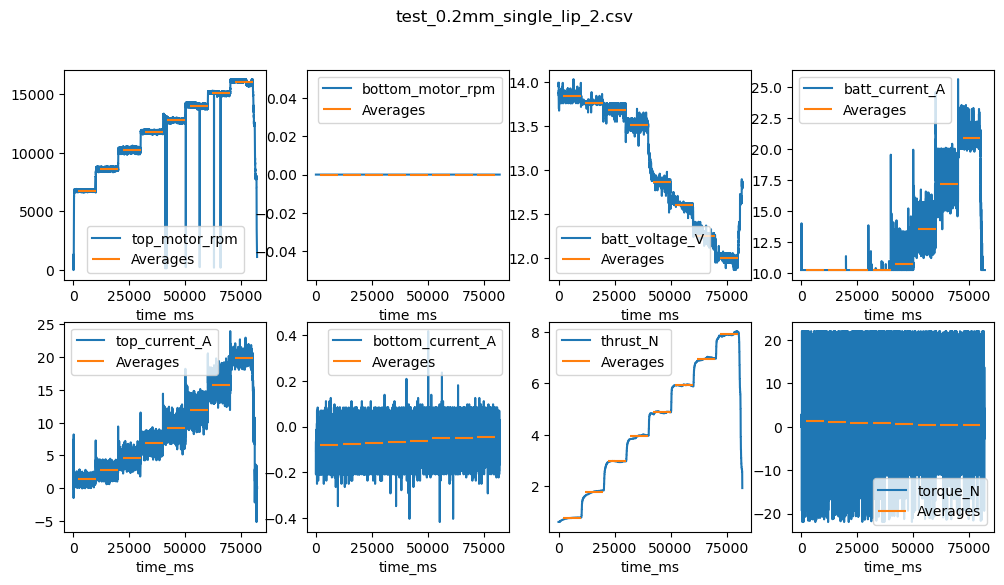

In [179]:
# Debug plots
# fig = plt.figure(figsize=(12, 6*len(data_dict)))
# subfigs = fig.subfigures(len(data_dict), 1)
# if not isinstance(subfigs, np.ndarray):
#     subfigs = np.array([subfigs])
# for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
#     axs = subfig.subplots(2, 4)
#     for ax, col in zip(axs.flat, grp):
#         grp.reset_index(("test_name", "tip_clearance_mm")).plot(ax=ax, y=col)
#         ax.hlines(
#             df_steps[col].loc[n]["mean"],
#             step_start_times + transient_offset_ms,
#             step_start_times + transient_offset_ms + stable_step_duration_ms,
#             colors="C1",
#             label="Averages",
#         )
#         ax.legend()
#     subfig.suptitle(n)
# Assuming `data_dict` is a dictionary
last_key = list(data_dict.keys())[-1]
last_data = data_dict[last_key]

fig = plt.figure(figsize=(12, 6))
subfig = fig.subplots(2, 4)

for ax, col in zip(subfig.flat, last_data.columns):
    last_data.plot(ax=ax, y=col)
    ax.hlines(
        df_steps[col].loc[last_key]["mean"],
        step_start_times + transient_offset_ms,
        step_start_times + transient_offset_ms + stable_step_duration_ms,
        colors="C1",
        label="Averages",
    )
    ax.legend()

fig.suptitle(last_key)
plt.show()

In [180]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = df_steps["batt_voltage_V"]["std"] / batt_voltage_mean

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "top_rpm": df_steps["top_motor_rpm"]["mean"],
        "bottom_rpm": df_steps["bottom_motor_rpm"]["mean"],
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "batt_voltage_mean": batt_voltage_mean,
        "hall_current_mean": hall_current_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": np.abs(batt_power_rel_err * batt_power_mean),
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [181]:
#df_thrust_power_agg = df_thrust_power[(df_thrust_power.index.get_level_values('throttle') >= 60) & (df_thrust_power.index.get_level_values('tip_clearance_mm') != 'Open Air')].groupby('tip_clearance_mm').agg('mean')
#df_thrust_power_agg

In [182]:
#plt.errorbar(x=df_thrust_power_agg.index.get_level_values('tip_clearance_mm'), y="thrust_power_g_W", yerr="thrust_power_err", data=df_thrust_power_agg, fmt='o', capsize=3, markersize=3)

In [183]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

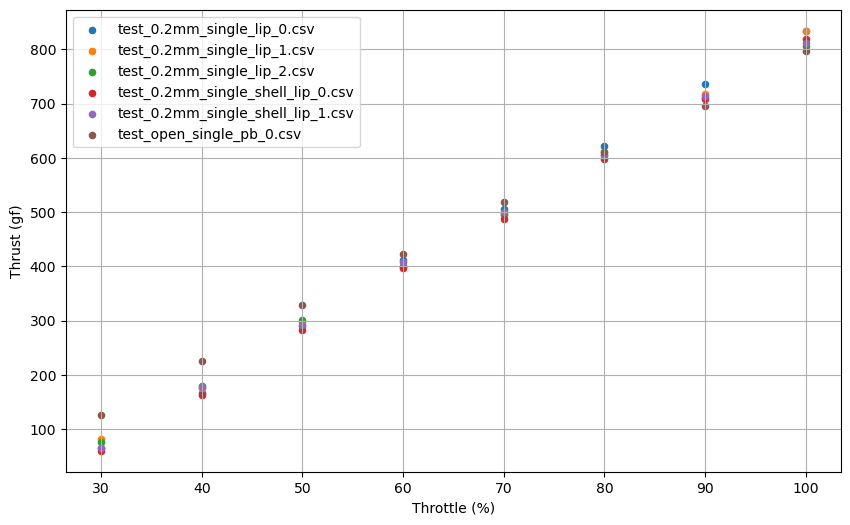

In [184]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", data=grp, label=n, s=20)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.legend()
plt.grid()
plt.show()

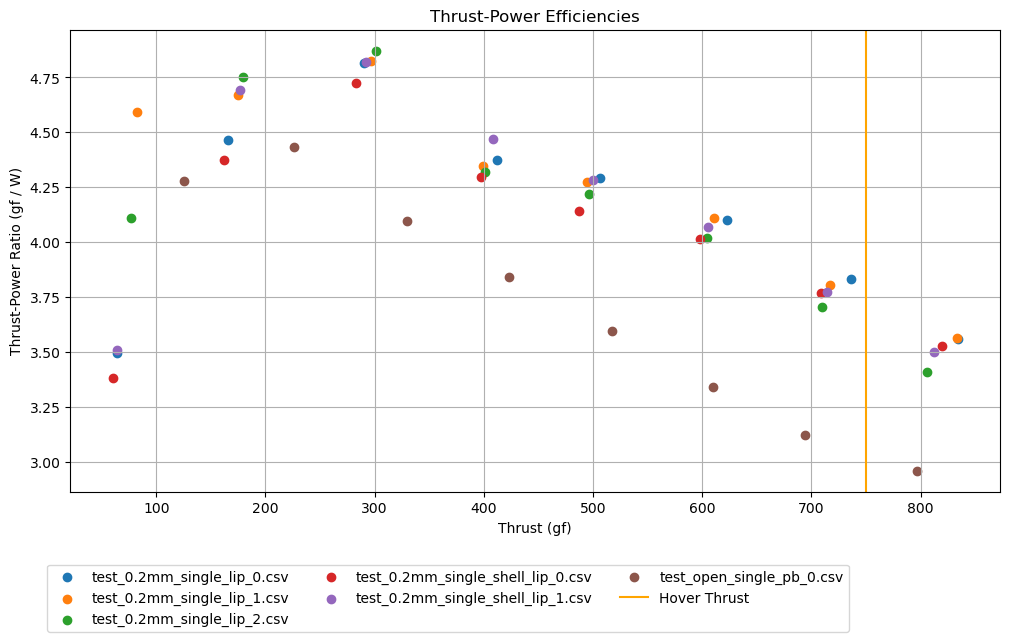

In [185]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
# plt.xlim(400, 1750)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

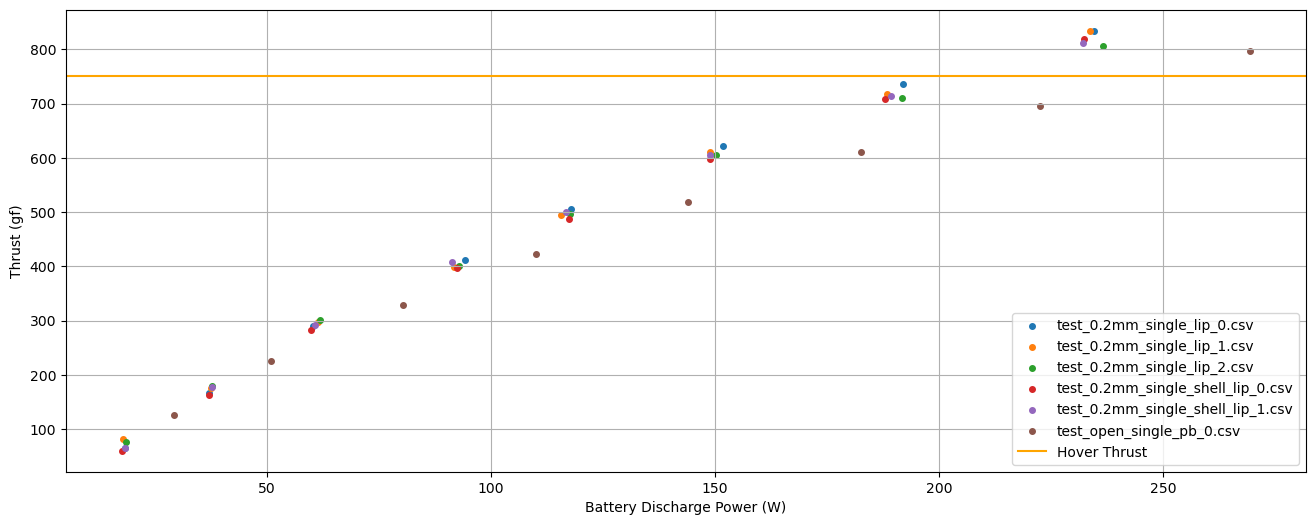

In [186]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="batt_power_mean", y="thrust_mean_g", data=grp, label=n, s=16)
plt.ylabel("Thrust (gf)")
plt.xlabel("Battery Discharge Power (W)")
plt.grid()
plt.axhline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.legend()
plt.show()

# My Stuff

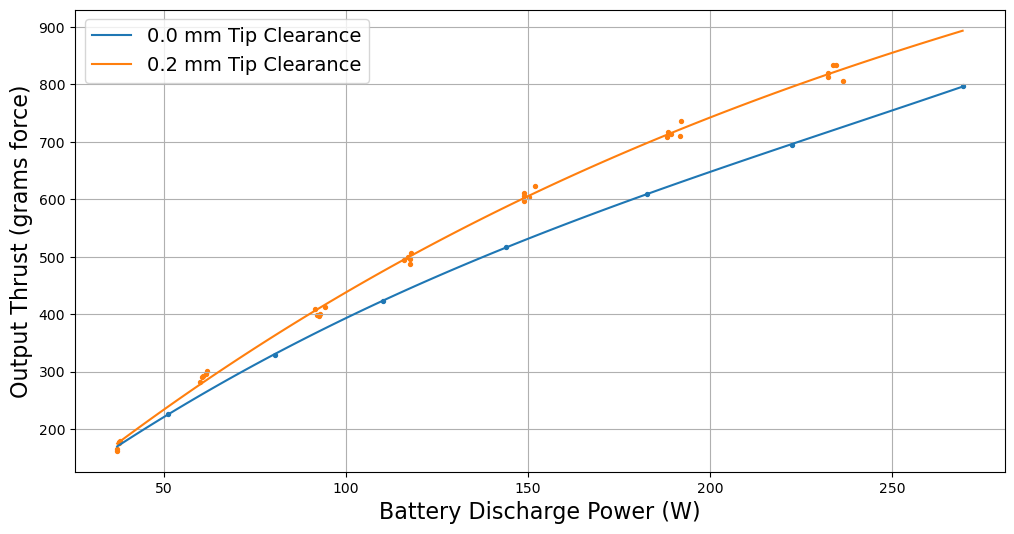

In [187]:
import numpy as np

DEGREE = 3
N = 100
min_thrust = hover_thrust_g - 600
max_thrust = payload_thrust_g + 200

x_label = "batt_power_mean"
y_label = "thrust_mean_g"
err_label = "batt_power_err"
x_min = 1e9
x_max = -1e9


def extract_roi(grp, x_label, ylabel, min_thrust, max_thrust):
    grp = grp[grp["thrust_mean_g"] > min_thrust]
    grp = grp.sort_values("thrust_mean_g")
    x = grp[x_label].to_numpy()
    y = grp[y_label].to_numpy()
    err = grp[err_label].to_numpy()
    return x, y, err


plt.figure(figsize=(12, 6))

# Analyze data.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    x_min = min(x_min, min(x))
    x_max = max(x_max, max(x))

x_dense = np.linspace(x_min, x_max, N)

# Plot inerpolation.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    coeffs = np.polyfit(x, y, DEGREE)
    poly = np.poly1d(coeffs)
    legend_label = str(n) + " mm Tip Clearance"
    if (n == 'Open Air'): legend_label = n

    plt.plot(x_dense, poly(x_dense), label=legend_label)
    plt.scatter(x, y, s=8)

plt.xlabel("Battery Discharge Power (W)", fontsize=16)
plt.ylabel("Output Thrust (grams force)", fontsize=16)
plt.grid()
plt.legend(fontsize=14)
# plt.xlim(200, 260)
# plt.ylim(600, 800)
plt.show()

In [69]:
8/7

1.1428571428571428